In [1]:
import cv2
import numpy as np
import PIL
import io
import html
import time
import imageio
import matplotlib.pyplot as plt
import BodyTracker as Bt
from utils import *
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw_ndim

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject


In [2]:
def pose(img):
    pTime = 0    
    lmList=[]

    nframes=30 # is the number of saved frames for the function live_tracker
    iterator=0
    angles=[]
    refTime=time.time()
    tracker=live_tracker(nframes)

     #positioning of text and dimensions
    h_angle=50
    w_angle=100
    h_j=65
    w_j=w_angle
    fontScale=2
    thickness=2

    width,height, c=img.shape
    size=(width, height)
    #writer= cv2.VideoWriter('runpose.mp4', cv2.VideoWriter_fourcc('M','J','P','G'), 20, (width,height))
    img = detector.findPose(img)
    lmList = detector.findPosition(img)
    #print(img)
    points=[12, 14, 16]
    p=points
    maxim=max(points)
    angle=0
    lmList1=[]
    inf=60
    sup=140
    #draw angle and perform evaluation
    """if(maxim>len(lmList)):
        draw=False
    if(search(lmList, p[0])  and search(lmList, p[1] ) ) and ( search(lmList, p[2]) ):
        draw=True"""
    angle=detector.findAngle(img, p[0], p[1], p[2]), 
    angles.append(angle)
    if(True):
        judge(img, angle, inf, sup)
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    lmList1.append(lmList)
    #cv2.imshow("Capture1",img)
    #writer.write(img)
    return cTime,lmList1


In [3]:
videoPush2='videos/push2.avi'
videoPush1='videos/push1.avi'
videoPick1='videos/pick1.avi'
videoPick2='videos/pick2.avi'

In [4]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPick1)
cap2=cv2.VideoCapture(videoPick2)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    #print(Kp1[0])
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)
    
    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break

    


IndexError: list index out of range

In [18]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0))

In [19]:
paths

array([[   0.        ,           inf,           inf, ...,           inf,
                  inf,           inf],
       [          inf,    0.        ,  142.        , ..., 7858.9244175 ,
        7860.18918347, 7862.55829867],
       [          inf,  117.        ,   25.        , ..., 4439.34060419,
        4439.40547821, 4440.05596812],
       ...,
       [          inf, 5002.7252573 , 4280.42287631, ..., 2879.3697227 ,
        2881.43210921, 2885.10103809],
       [          inf, 5003.80615132, 4280.59154791, ..., 2879.84652369,
        2879.60743852, 2880.98247131],
       [          inf, 5006.36355052, 4280.62939297, ..., 2880.93943012,
        2879.67012   , 2879.79652059]])

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

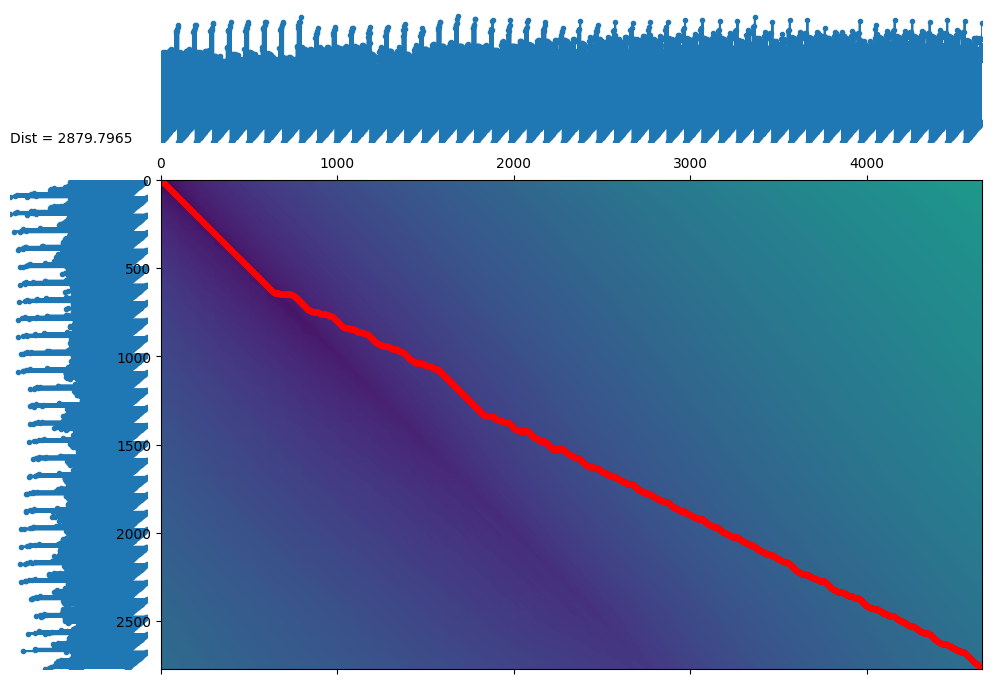

In [20]:
best_path = dtw.best_path(paths)  #take the path with the minimum distance
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [8]:
for i in range(0, Kp1.shape[0], 3):
    print(kp1_list[0][i+1], kp1_list[0][i+2])

117 93
119 91
120 91
121 91
117 90
115 90
114 89
122 93
113 90
118 96
115 95
125 109
99 103
126 129
89 119
126 147
93 135
127 152
94 139
128 153
96 138
127 151
96 135
117 147
102 147
116 178
103 183
110 205
102 179
108 208
103 175
108 216
101 189


In [9]:
print(len(kp2_list))
print(len(kp1_list))
print(kp1_list[0])
print(len(kp1_list[0]))

52
52
[  0 117  93   1 119  91   2 120  91   3 121  91   4 117  90   5 115  90
   6 114  89   7 122  93   8 113  90   9 118  96  10 115  95  11 125 109
  12  99 103  13 126 129  14  89 119  15 126 147  16  93 135  17 127 152
  18  94 139  19 128 153  20  96 138  21 127 151  22  96 135  23 117 147
  24 102 147  25 116 178  26 103 183  27 110 205  28 102 179  29 108 208
  30 103 175  31 108 216  32 101 189]
99


### Show all keypoints in both videos at the same time

In [13]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(videoPick1)
cap2=cv2.VideoCapture(videoPick2)

cpt = 0

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break


    for i in range(0, Kp1.shape[0], 3):
        if len(kp1_list[cpt]) != 0:
            x, y = kp1_list[cpt][i+1], kp1_list[cpt][i+2]
            cv2.circle(img1, (x, y), 4, (255, 0, 0), thickness=1)
    
    for i in range(0, Kp2.shape[0], 3):
        if len(kp2_list[cpt]) != 0:
            x, y = kp2_list[cpt][i+1], kp2_list[cpt][i+2]
            cv2.circle(img2, (x, y), 4, (255, 0, 0), thickness=1)
        
    cpt = cpt+1
    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(100)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
cap1.release()
cap2.release()


In [11]:
print(len(best_path))
print(best_path[4700])

4705
(2767, 4648)


### Show Similar keypoints in both videos at the same time

In [12]:
threshold = 300
keypoints = []
for (i, j), dist in np.ndenumerate(paths):
    if dist < threshold:
        keypoints.append((i, j))

In [175]:
allPointsKp1 = []
concatenated_Kp1 = np.concatenate(kp1_list, axis=0)
a = 0
for i in range(0, concatenated_Kp1.shape[0], 3):
        allPointsKp1.append(a)
        allPointsKp1.append(concatenated_Kp1[i+1])
        allPointsKp1.append(concatenated_Kp1[i+2])

        a = a + 1

allPointsKp1= np.array(allPointsKp1)

allPointsKp2 = []
concatenated_Kp2 = np.concatenate(kp2_list, axis=0)
a = 0
for i in range(0, concatenated_Kp2.shape[0], 3):
        allPointsKp2.append(a)
        allPointsKp2.append(concatenated_Kp2[i+1])
        allPointsKp2.append(concatenated_Kp2[i+2])

        a = a + 1

allPointsKp2= np.array(allPointsKp2)

In [223]:
print(allPointsKp1)
print(allPointsKp1.shape)

[  0. 117.  93. ... 923. 104. 160.]
(2772,)


In [222]:
print(allPointsKp2)
print(allPointsKp2.shape)

[   0.  142.   69. ... 1550.  141.  193.]
(4653,)


In [211]:
allSimilarKp1 = []
allSimilarKp2 = []
for i in range(0, len(best_path)): #(keypoints)
        for j in range(0, len(allPointsKp1), 2):
                if allPointsKp1[j] == best_path[i][0]: #(keypoints)
                        x, y = allPointsKp1[j + 1], allPointsKp1[j + 2]
                        allSimilarKp1.append(allPointsKp1[j])
                        allSimilarKp1.append((x,y))
                        break
        
        

        for j in range(0, len(allPointsKp2), 2):#(keypoints)
                if allPointsKp2[j] == best_path[i][1]:#(keypoints)
                        x, y = allPointsKp2[j + 1], allPointsKp2[j + 2]
                        allSimilarKp2.append(allPointsKp2[j])
                        allSimilarKp2.append((x,y))
                        break
        
        

allSimilarKp1 = np.array(allSimilarKp1)
allSimilarKp2 = np.array(allSimilarKp2)

C:\Users\bouzi\AppData\Local\Temp\ipykernel_19864\42099246.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  allSimilarKp1 = np.array(allSimilarKp1)
C:\Users\bouzi\AppData\Local\Temp\ipykernel_19864\42099246.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  allSimilarKp2 = np.array(allSimilarKp2)


In [219]:
print(allSimilarKp2.shape)
print(allSimilarKp1.shape)

(1690,)
(1322,)


In [217]:
allSimilarKp1[1200:1400]

array([842.0, (85.0, 102.0), 842.0, (85.0, 102.0), 842.0, (85.0, 102.0),
       842.0, (85.0, 102.0), 842.0, (85.0, 102.0), 842.0, (85.0, 102.0),
       842.0, (85.0, 102.0), 842.0, (85.0, 102.0), 842.0, (85.0, 102.0),
       842.0, (85.0, 102.0), 842.0, (85.0, 102.0), 842.0, (85.0, 102.0),
       844.0, (85.0, 103.0), 846.0, (86.0, 103.0), 848.0, (117.0, 108.0),
       848.0, (117.0, 108.0), 850.0, (106.0, 136.0), 852.0, (98.0, 171.0),
       854.0, (92.0, 177.0), 854.0, (92.0, 177.0), 856.0, (104.0, 187.0),
       858.0, (116.0, 71.0), 860.0, (119.0, 73.0), 860.0, (119.0, 73.0),
       862.0, (117.0, 69.0), 864.0, (116.0, 67.0), 866.0, (118.0, 69.0),
       866.0, (118.0, 69.0), 868.0, (115.0, 74.0), 868.0, (115.0, 74.0),
       868.0, (115.0, 74.0), 870.0, (119.0, 76.0), 872.0, (92.0, 90.0),
       872.0, (92.0, 90.0), 874.0, (75.0, 103.0), 874.0, (75.0, 103.0),
       874.0, (75.0, 103.0), 876.0, (68.0, 105.0), 878.0, (70.0, 106.0),
       880.0, (74.0, 106.0), 882.0, (114.0, 97.0)

In [226]:
width = 600
height = 600
threshold = 0.5

cap1=cv2.VideoCapture(videoPick1)
cap2=cv2.VideoCapture(videoPick2)

cpt = 0

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success1 is False or img2 is None:
        break


    for i in range(0, allSimilarKp1.shape[0], 2):
        if  0+cpt <= allSimilarKp1[i] <= 32 + cpt:
            print(allSimilarKp1[i])
            x, y = allSimilarKp1[i+1][0], allSimilarKp1[i+1][1]
            cv2.circle(img1, (int(x), int(y)), 4, (255, 0, 0), thickness=1)
    
    for i in range(0, allSimilarKp2.shape[0], 2):
        if (0+cpt) <= int(allSimilarKp2[i]) <= 32 + cpt:
            
            x, y = allSimilarKp2[i+1][0], allSimilarKp2[i+1][1]
            cv2.circle(img2, (int(x), int(y)), 4, (255, 0, 0), thickness=1)
        
    cpt = cpt + 32
    
    cv2.imshow("Video 1", img1)
    cv2.imshow("Video 2", img2)

    key = cv2.waitKey(300)
    if key == ord('q'):
        break

cv2.destroyAllWindows()
cap1.release()
cap2.release()


0.0
2.0
4.0
6.0
8.0
10.0
12.0
14.0
16.0
18.0
20.0
22.0
24.0
26.0
28.0
30.0
32.0
32.0
34.0
36.0
38.0
40.0
42.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
56.0
57.0
58.0
60.0
61.0
62.0
63.0
64.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0
119.0
120.0
121.0
122.0
123.0
124.0
125.0
126.0
127.0
128.0
128.0
129.0
130.0
131.0
132.0
133.0
134.0
135.0
136.0
137.0
138.0
139.0
140.0
141.0
142.0
143.0
144.0
145.0
146.0
147.0
148.0
149.0
150.0
151.0
152.0
153.0
154.0
156.0
157.0
158.0
159.0
160.0
160.0
162.0
163.0
164.0
165.0
166.0
167.0
168.0
169.0
170.0
171.0
172.0
173.0
174.0
175.0
176.0
177.0
178.0
179.0
180.0
181.0
182.0
183.0
184.0
185.0
186.0
187.0
188.0
189.0
190.0
191.0
192.0
192.0
193.0
194.0
195.0
196.0
198.0
199.0
200.0
201.

# TESTS

In [104]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPush2)
cap2=cv2.VideoCapture(videoPick1)

cv2.namedWindow("Video 1", cv2.WINDOW_NORMAL)
cv2.namedWindow("Video 2", cv2.WINDOW_NORMAL)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(20)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



In [ ]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0))

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

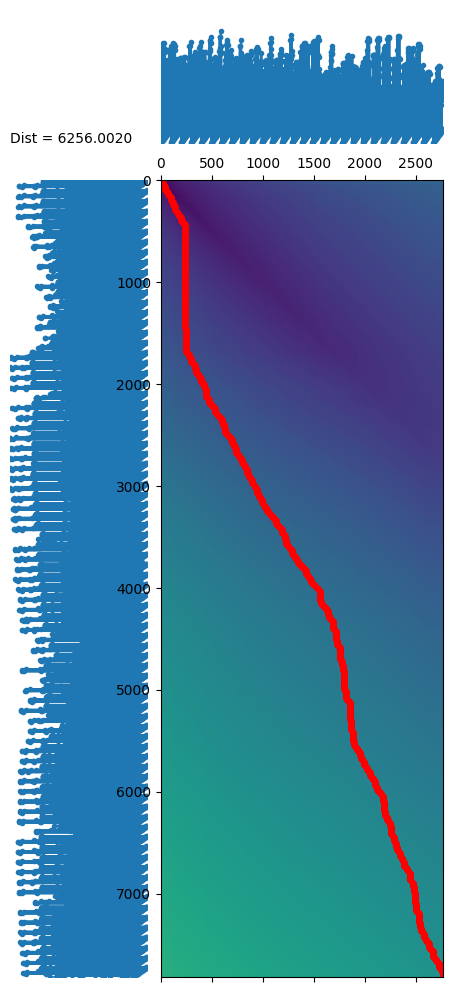

In [20]:
best_path = dtw.best_path(paths)  #take the path with the minimum distance
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [21]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPick2)
cap2=cv2.VideoCapture(videoPick1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



In [22]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0))

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

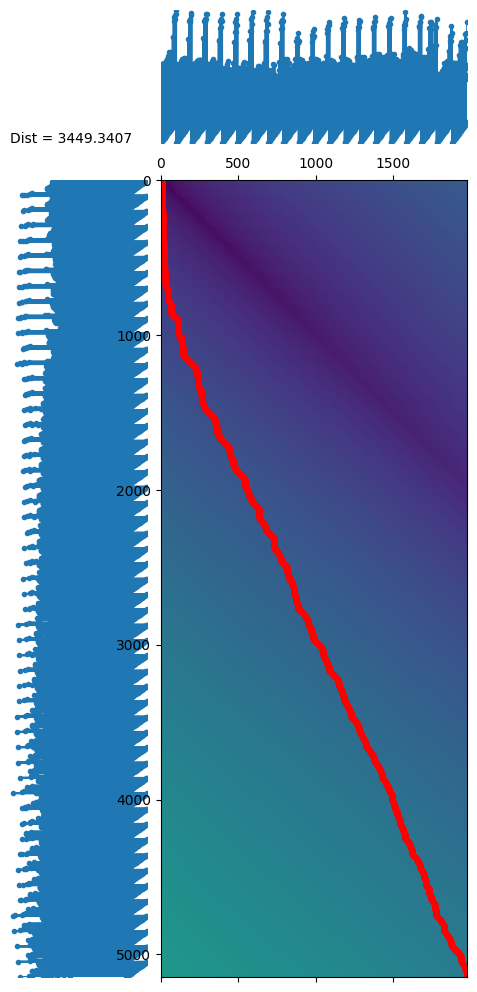

In [23]:
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [4]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPush1)
cap2=cv2.VideoCapture(videoPush1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



In [5]:
distance, paths= dtw.warping_paths(np.concatenate(kp1_list, axis=0), np.concatenate(kp1_list, axis=0))

(<Figure size 1000x1000 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

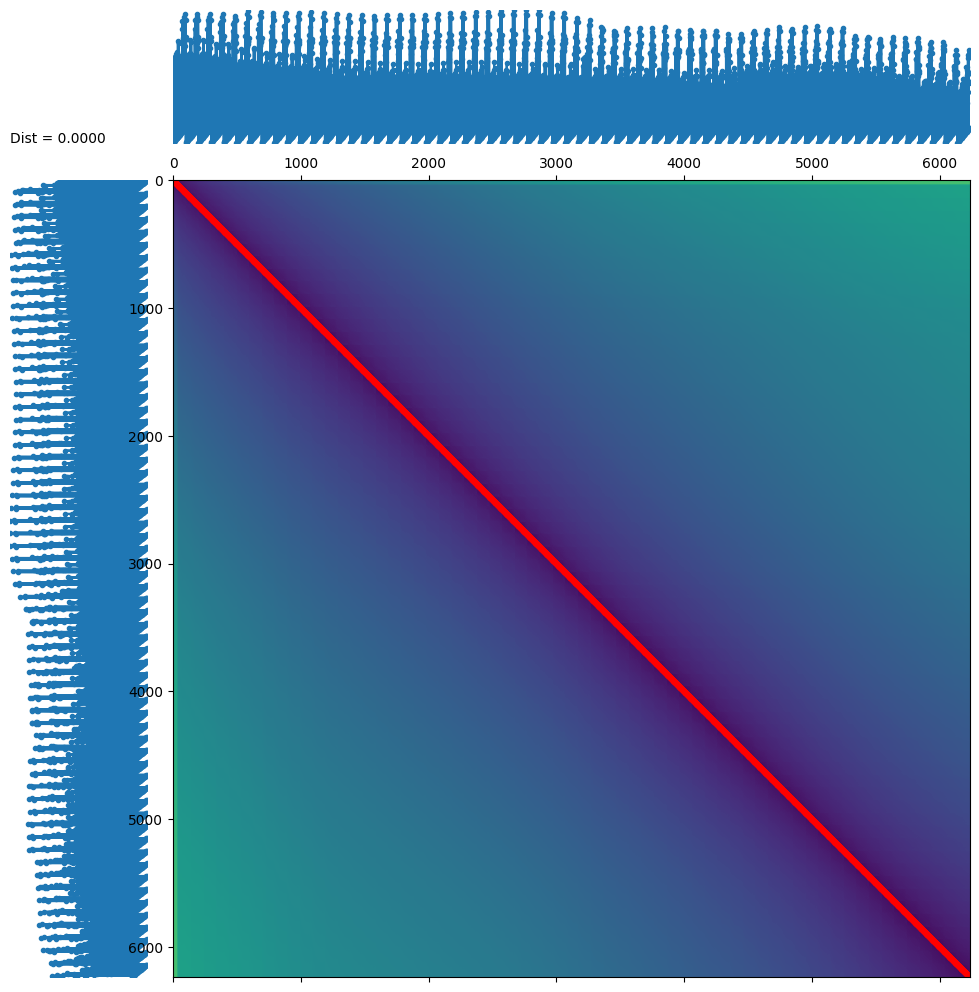

In [6]:
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(np.concatenate(kp1_list, axis=0), np.concatenate(kp2_list, axis=0), paths, best_path)

In [13]:
detector = Bt.poseDetector()
cap1=cv2.VideoCapture(videoPick2)
cap2=cv2.VideoCapture(videoPush1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

kp1_list = []
kp2_list = []

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:
    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break

    if success is False or img2 is None:
        break

    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()
    kp1_list.append(Kp1)

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()
    kp2_list.append(Kp2)

    if (cTime1-refTime)>duration:
        break

    if (cTime2-refTime)>duration:
        break

    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break



### Average of distances

In [12]:
cap1=cv2.VideoCapture(videoPick2)
cap2=cv2.VideoCapture(videoPick1)

allDistances = []
nframes=30 # is the number of saved frames for the function live_tracker
refTime=time.time()
w_angle=100

try:
    duration=args.max_len
    if duration is None:
        duration=25
except:
    duration=40

while True:

    success, img1 = cap1.read()
    success1, img2 = cap2.read() 

    if success is False or img1 is None:
        break
    #print(success)

    if success is False or img2 is None:
        break


    cTime1, Kp1=pose(img1)
    Kp1= np.array(Kp1)
    Kp1 = Kp1.flatten()

    cTime2, Kp2=pose(img2)
    Kp2= np.array(Kp2)
    Kp2 = Kp2.flatten()

    
    distance, paths= dtw.warping_paths(Kp1, Kp2)
    allDistances.append(distance)
    print(distance)
    #dtwvis.plot_warpingpaths(Kp1, Kp2, paths)

    
    
    key=cv2.waitKey(10)
    if key == ord('q'):
        break

    if (cTime1-refTime)>duration:
        print("end ")
        break

    if (cTime2-refTime)>duration:
        print("end ")
        break
    
cap1.release()
cap2.release()
cv2.destroyAllWindows()

inf
inf
179.7386992275175
122.85357137665962
111.98214143335535
101.03464752252071
164.90906585145646
173.91089672588086
200.22737075634788
inf
243.72935810033226
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
345.84100393099715
327.9222468817875
271.60081001351966
242.57988374966297
272.8387802347753
237.27410309597633
267.58550035455954
257.81388635990885
245.57076373216742
263.4331034627197
inf
inf
351.3374446312263
233.40094258592873


In [14]:
import math
filtered_data = [v for v in allDistances if not (math.isinf(v) or math.isnan(v))]
print(np.average(filtered_data))

230.779211001365


DTW on arrays


In [7]:
s1 = np.array([0., 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0])
s2 = np.array([0., 1, 2, 3, 1, 0, 0, 0, 2, 1, 0, 0, 0])
path = dtw.warping_path(s1, s2)
print(path)


[(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (4, 4), (5, 5), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (11, 11), (12, 12)]


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

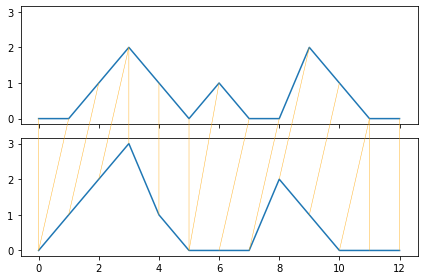

In [8]:
dtwvis.plot_warping(s1, s2, path)